### Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

### Data Collection

In [2]:
data = pd.read_csv('heart_disease_data.csv')

In [3]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
data.shape

(303, 14)

### Data Preprocessing

In [5]:
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [7]:
data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [8]:
data['target'].value_counts()

target
1    165
0    138
Name: count, dtype: int64

In [9]:
# 1 -> have heart disease
# 0 -> doesn't have heart disease

In [10]:
data.groupby('target').mean()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
target,,,,,,,,,,,,,
0,56.601449,0.826087,0.478261,134.398551,251.086957,0.159420,0.449275,139.101449,0.550725,1.585507,1.166667,1.166667,2.543478
1,52.496970,0.563636,1.375758,129.303030,242.230303,0.139394,0.593939,158.466667,0.139394,0.583030,1.593939,0.363636,2.121212


In [11]:
X = data.drop('target',axis = 1)
y = data.target

In [12]:
X.shape

(303, 13)

In [13]:
y.shape

(303,)

In [14]:
scaler = MinMaxScaler()

In [15]:
scaled_data = scaler.fit_transform(X)

In [16]:
scaled_data[0]

array([0.70833333, 1.        , 1.        , 0.48113208, 0.24429224,
       1.        , 0.        , 0.60305344, 0.        , 0.37096774,
       0.        , 0.        , 0.33333333])

### Train_Test_Splits

In [17]:
x_train,x_test,y_train,y_test = train_test_split(scaled_data, y, test_size = 0.2, stratify = y)

In [18]:
x_train.shape

(242, 13)

In [19]:
y_train.shape

(242,)

In [20]:
x_test.shape

(61, 13)

In [21]:
y_test.shape

(61,)

### Models Training with GridSearchCV

In [22]:
from sklearn.model_selection import ShuffleSplit, GridSearchCV
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

def gridsearchcv(X, y):
    algos = {
        'naive_bayes': {
            'model': GaussianNB(),
            'params': {
               'priors' : [None]
            }
        },
        'decision_tree': {
            'model': DecisionTreeClassifier(),
            'params': {
                'min_samples_split': [40]
            }
        },
        'random_forest': {
            'model': RandomForestClassifier(),
            'params': {
                'criterion' : ['gini']
            }
        },
        'logistic_regression': {
            'model': LogisticRegression(max_iter=1000),
            'params': {
                'solver': ['liblinear', 'saga'],
                'penalty': ['l1', 'l2']
            }
        }
    }
    scores = []
    cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
    for algo_name, config in algos.items():
        gscv = GridSearchCV(config['model'], config['params'], cv=cv, return_train_score=False)
        gscv.fit(X, y)
        scores.append({
            'model': algo_name,
            'best_score': gscv.best_score_,
            'best_params': gscv.best_params_
        })
        best_estimator = gscv.best_estimator_
        pickle.dump(best_estimator, open(f'{algo_name}_model.p', 'wb'))

    return pd.DataFrame(scores, columns=['model', 'best_score', 'best_params'])

In [23]:
stats = gridsearchcv(x_train,y_train)

In [24]:
stats.to_csv('stats.csv')

In [25]:
stats

,model,best_score,best_params
0,naive_bayes,0.816327,{'priors': None}
1,decision_tree,0.697959,{'min_samples_split': 40}
2,random_forest,0.816327,{'criterion': 'gini'}
3,logistic_regression,0.808163,"{'penalty': 'l2', 'solver': 'saga'}"


### Models Evaluation

#### Decision Trees Model Evaluation

In [26]:
with open('decision_tree_model.p', 'rb') as file:
    model1 = pickle.load(file)

In [27]:
model1.score(x_train,y_train)

0.8264462809917356

In [28]:
model1.score(x_test,y_test)

0.7868852459016393

Text(58.222222222222214, 0.5, 'Truth')

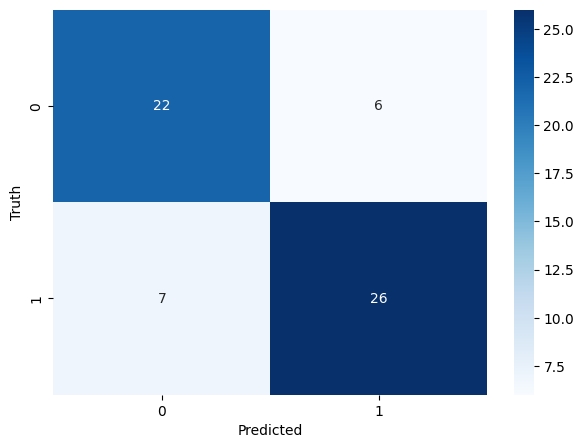

In [29]:
cm = confusion_matrix(y_test, model1.predict(x_test))
plt.figure(figsize = (7,5))
sns.heatmap(cm, annot=True, cmap=plt.cm.Blues)
plt.xlabel('Predicted')
plt.ylabel('Truth')

#### Random Forest Model Evaluation

In [30]:
with open('random_forest_model.p', 'rb') as file:
    model2 = pickle.load(file)

In [31]:
model2.score(x_train,y_train)

1.0

In [32]:
model2.score(x_test,y_test)

0.8360655737704918

Text(58.222222222222214, 0.5, 'Truth')

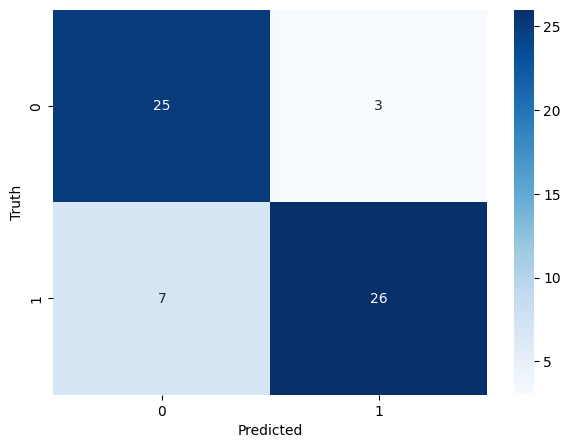

In [33]:
cm = confusion_matrix(y_test, model2.predict(x_test))
plt.figure(figsize = (7,5))
sns.heatmap(cm, annot=True, cmap=plt.cm.Blues)
plt.xlabel('Predicted')
plt.ylabel('Truth')

#### Naive Bayes Model Evaluation

In [34]:
with open('naive_bayes_model.p', 'rb') as file:
    model3 = pickle.load(file)

In [35]:
model3.score(x_train,y_train)

0.8347107438016529

In [36]:
model3.score(x_test,y_test)

0.8688524590163934

Text(58.222222222222214, 0.5, 'Truth')

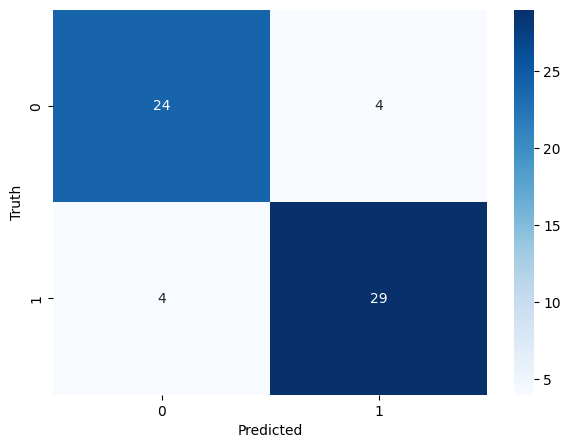

In [37]:
cm = confusion_matrix(y_test, model3.predict(x_test))
plt.figure(figsize = (7,5))
sns.heatmap(cm, annot=True, cmap=plt.cm.Blues)
plt.xlabel('Predicted')
plt.ylabel('Truth')

#### Logistic Regression Model Evaluation

In [38]:
with open('logistic_regression_model.p', 'rb') as file:
    model4 = pickle.load(file)

In [39]:
model4.score(x_train,y_train)

0.8388429752066116

In [40]:
model4.score(x_test,y_test)

0.8524590163934426

Text(58.222222222222214, 0.5, 'Truth')

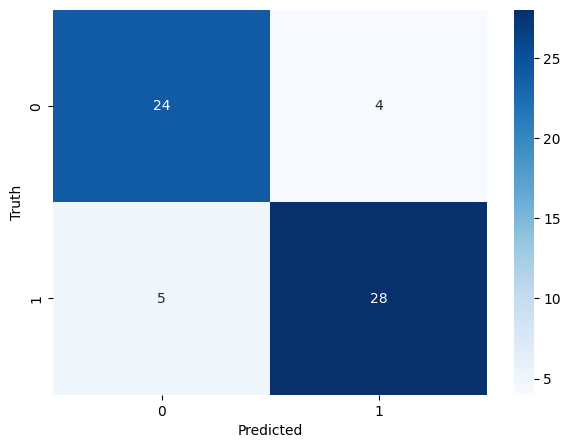

In [41]:
cm = confusion_matrix(y_test, model4.predict(x_test))
plt.figure(figsize = (7,5))
sns.heatmap(cm, annot=True, cmap=plt.cm.Blues)
plt.xlabel('Predicted')
plt.ylabel('Truth')